# Rf 1 0 4_Classfactory
Basic functionality: the class factory for functions and p.d.f.s

NOTE: This demo uses code that is generated by the macro,
     which can be compiled on the fly (set to MyPdfV3 below).
     To use MyPdfV1 or MyPdfV2, adjust lines below accordingly.




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:40 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Write class skeleton code
--------------------------------------------------

Write skeleton p.d.f class with variable x,a,b
To use this class,
   - Edit the file MyPdfV1.cxx and implement the evaluate() method in terms of x,a and b
   - Compile and link class with '.x MyPdfV1.cxx+'

In [2]:
ROOT.RooClassFactory.makePdf("MyPdfV1", "x,A,B")

False


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



With added initial value expression
---------------------------------------------------------------------

Write skeleton p.d.f class with variable x,a,b and given formula expression
To use this class,
   - Compile and link class with '.x MyPdfV2.cxx+'

In [3]:
ROOT.RooClassFactory.makePdf(
    "MyPdfV2", "x,A,B", "", "A*fabs(x)+pow(x-B,2)")

False

With added analytical integral expression
---------------------------------------------------------------------------------

Write skeleton p.d.f class with variable x,a,b, given formula expression _and_
given expression for analytical integral over x
To use this class,
   - Compile and link class with '.x MyPdfV3.cxx+'

In [4]:
ROOT.RooClassFactory.makePdf(
    "MyPdfV3",
    "x,A,B",
    "",
    "A*fabs(x)+pow(x-B,2)",
    ROOT.kTRUE,
    ROOT.kFALSE,
    "x:(A/2)*(pow(x.max(rangeName),2)+pow(x.min(rangeName),2))+(1./3)*(pow(x.max(rangeName)-B,3)-pow(x.min(rangeName)-B,3))")

False

Use instance of created class
---------------------------------------------------------

Compile MyPdfV3 class

In [5]:
ROOT.gROOT.ProcessLineSync(".x MyPdfV3.cxx+")

94135580007376L

(MyPdfV3) An instance of MyPdfV3.


Info in <TUnixSystem::ACLiC>: creating shared library /mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/v618_TMP/notebooks/./MyPdfV3_cxx.so


Creat instance of MyPdfV3 class

In [6]:
a = ROOT.RooRealVar("a", "a", 1)
b = ROOT.RooRealVar("b", "b", 2, -10, 10)
y = ROOT.RooRealVar("y", "y", -10, 10)
pdf = ROOT.MyPdfV3("pdf", "pdf", y, a, b)

Generate toy data from pdf and plot data and p.d.f on frame

In [7]:
frame1 = y.frame(ROOT.RooFit.Title("Compiled class MyPdfV3"))
data = pdf.generate(ROOT.RooArgSet(y), 1000)
pdf.fitTo(data)
data.plotOn(frame1)
pdf.plotOn(frame1)

<ROOT.RooPlot object ("frame_y_559da70ecf80") at 0x559da70ecf80>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 b            2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=2568.49 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIR

/
Compiled version of example rf103#
/

Declare observable x

In [8]:
x = ROOT.RooRealVar("x", "x", -20, 20)

The ROOT.RooClassFactory.makePdfInstance() function performs code writing, compiling, linking
and object instantiation in one go and can serve as a straight
replacement of ROOT.RooGenericPdf

In [9]:
alpha = ROOT.RooRealVar("alpha", "alpha", 5, 0.1, 10)
genpdf = ROOT.RooClassFactory.makePdfInstance(
    "GenPdf",
    "(1+0.1*fabs(x)+sin(sqrt(fabs(x*alpha+0.1))))",
    ROOT.RooArgList(
        x,
        alpha))

Info in <TUnixSystem::ACLiC>: creating shared library /mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/v618_TMP/notebooks/RooGenPdfPdf_cxx.so


Generate a toy dataset from the interpreted p.d.f

In [10]:
data2 = genpdf.generate(ROOT.RooArgSet(x), 50000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(GenPdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(GenPdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Fit the interpreted p.d.f to the generated data

In [11]:
genpdf.fitTo(data2)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(GenPdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha        5.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=178267 FROM MIGRAD    STATUS=INITIATE        6 CALLS           7 TOTAL
                

Make a plot of the data and the p.d.f overlaid

In [12]:
frame2 = x.frame(ROOT.RooFit.Title("Compiled version of pdf of rf103"))
data2.plotOn(frame2)
genpdf.plotOn(frame2)

<ROOT.RooPlot object ("frame_x_559da75406f0") at 0x559da75406f0>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(GenPdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Draw all frames on a canvas

In [13]:
c = ROOT.TCanvas("rf104_classfactory", "rf104_classfactory", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()

c.SaveAs("rf104_classfactory.png")

Info in <TCanvas::Print>: png file rf104_classfactory.png has been created


Draw all canvases 

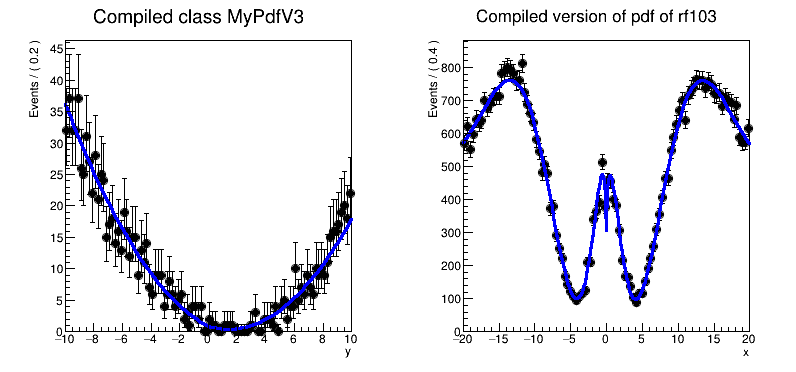

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()